<a href="https://colab.research.google.com/github/robin-wang/Tensorflow-MNIST-Setup/blob/master/TensorFlow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TENSORFLOW TRANING TUTORIAL**

Robin Wang April 2019

https://www.tensorflow.org/tutorials/keras/basic_classification

TensorFlow Module

In [0]:
#https://www.tensorflow.org/tutorials/keras/basic_classification
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

# Numpy and Matplotlib for Visualisation
import numpy as np
import matplotlib.pyplot as plt

# Confirm TensorFlow Version
print(tf.__version__)

1.13.1


Data Input

In [0]:
mnist_data = tf.keras.datasets.mnist

(train_images, train_values),(test_images, test_values) = mnist_data.load_data()
#Images are 28X28 NumPy arrays, pixel values ranging between 0 and 255
#Values are uint8 type from 0 to 9
train_images.shape


(60000, 28, 28)

In [0]:
train_values

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

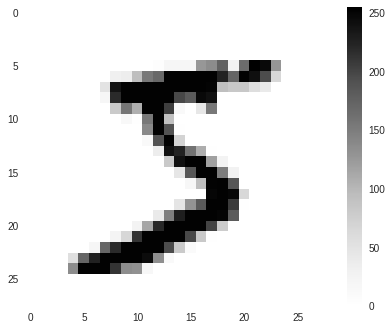

In [0]:
#Examine training images
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Data Preparation and Scaling

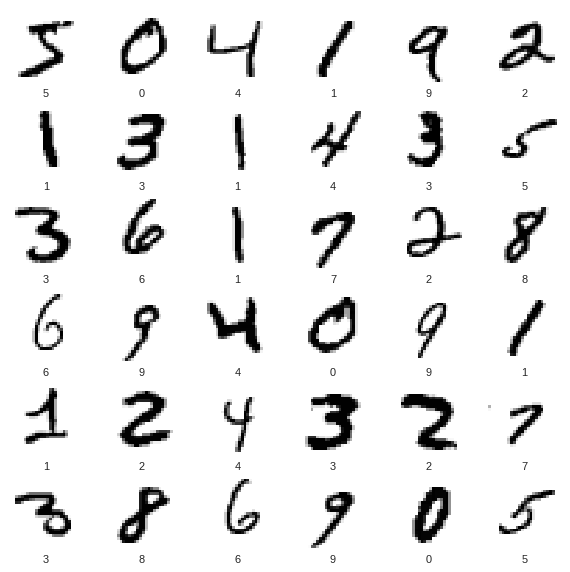

In [0]:
#Normalise 256 units to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#Display first images from training set and display class name for naked eye examination
plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_values[i])
plt.show()

Set up layers

In [0]:
#Flatten layer has no parameters to learn, only reformatting
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu), 
    #layer has 512 nodes/neurons
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
    #10-node softmax layer, returning an array of 10 probability scores thtat sum to 1
])

Model Compiling

In [0]:
# Loss Function - Measuring how accurate the model is
# Optimizer - Updating model based on data and loss function
# Metrics - monitor training and testing
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model Training

In [0]:
model.fit(train_images, train_values, epochs=5)
model.evaluate(test_images, test_values)


Epoch 1/5
60000/60000 [==============================] - 19s 309us/sample - loss: 0.2157 - acc: 0.9360
Epoch 2/5
60000/60000 [==============================] - 18s 294us/sample - loss: 0.0961 - acc: 0.9708
Epoch 3/5
60000/60000 [==============================] - 17s 287us/sample - loss: 0.0692 - acc: 0.9781
Epoch 4/5
60000/60000 [==============================] - 17s 278us/sample - loss: 0.0524 - acc: 0.9829
Epoch 5/5
10000/10000 [==============================] - 1s 75us/sample - loss: 0.0595 - acc: 0.9827


[0.05952361970787169, 0.9827]

Model predictions

In [0]:
predictions = model.predict(test_images)
predictions[0] #10 number array

array([4.5254508e-10, 7.2929712e-10, 1.0025044e-07, 1.0551009e-05,
       6.2649443e-14, 1.2322504e-07, 5.2747262e-14, 9.9998903e-01,
       3.5579088e-08, 1.3540607e-07], dtype=float32)

In [0]:
np.argmax(predictions[0])

7

In [0]:
test_values[0]

7

Graphing for 10 channels

In [0]:
def plot_image(i,predictions_array,true_label,img):
  predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img,cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color='grey'
    
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                   100*np.max(predictions_array),
                                   true_label),
                                   color=color)
      
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

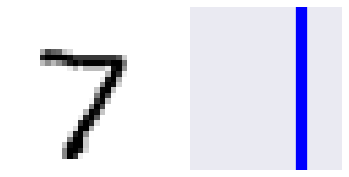

In [0]:
# test 1
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_values,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_values)
plt.show()

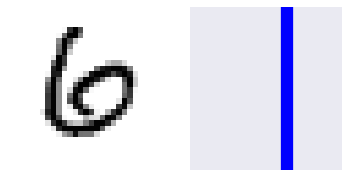

In [0]:
# test 2
i=11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_values,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_values)
plt.show()

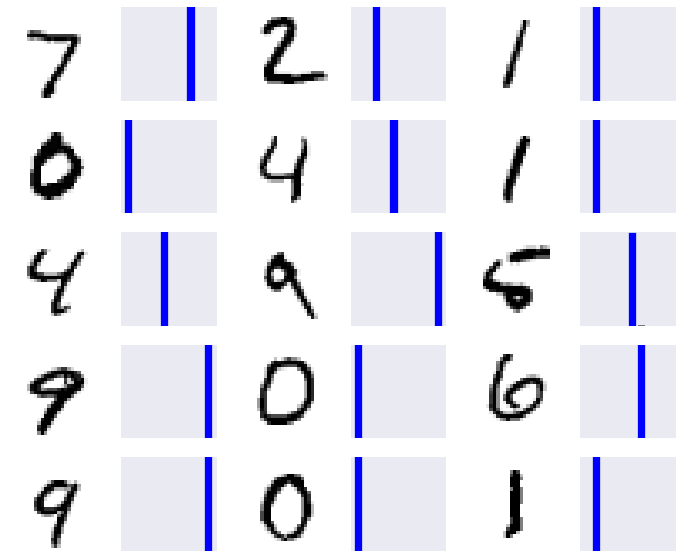

In [0]:
# plot first test images, predicted values, and true values
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions,test_values,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions,test_values)
plt.show()

In [0]:
# Take a random image from test data for verification
img = test_images[275]
print(img.shape)

(28, 28)


In [0]:
# Add image to a batch with only one number
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [0]:
# Predict
predictions_single = model.predict(img)
print(predictions_single)

[[4.6544376e-14 3.8027814e-12 2.5328229e-11 1.3650140e-11 9.9998820e-01
  5.3285487e-10 1.6933324e-12 2.5887144e-07 1.8257092e-11 1.1535511e-05]]


4

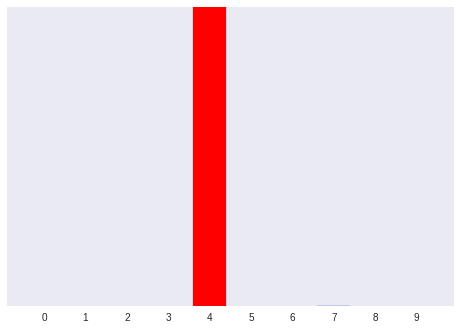

In [0]:
# Plot
plot_value_array(0,predictions_single,test_values)
_ = plt.xticks(range(10))
np.argmax(predictions_single[0])